In [201]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import  scipy.stats as stat

XY = pd.read_table('Vect6017XY.dat', delimiter='    ', names = ['X','Y'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Text(0,0.5,'Y')

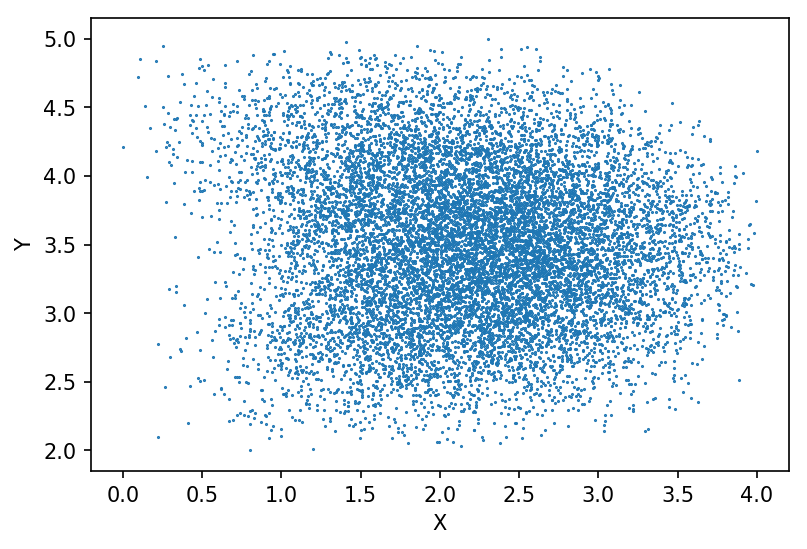

In [202]:
plt.figure(dpi = 150)
plt.plot(XY['X'],XY['Y'],'o', markersize = 0.5)
plt.xlabel('X')
plt.ylabel('Y')

Text(0.9,0.7,'b3=-0.0305251702366\nb2=0.23462200495\nb1=-0.607887155327\nb4=4.01395416596\n')

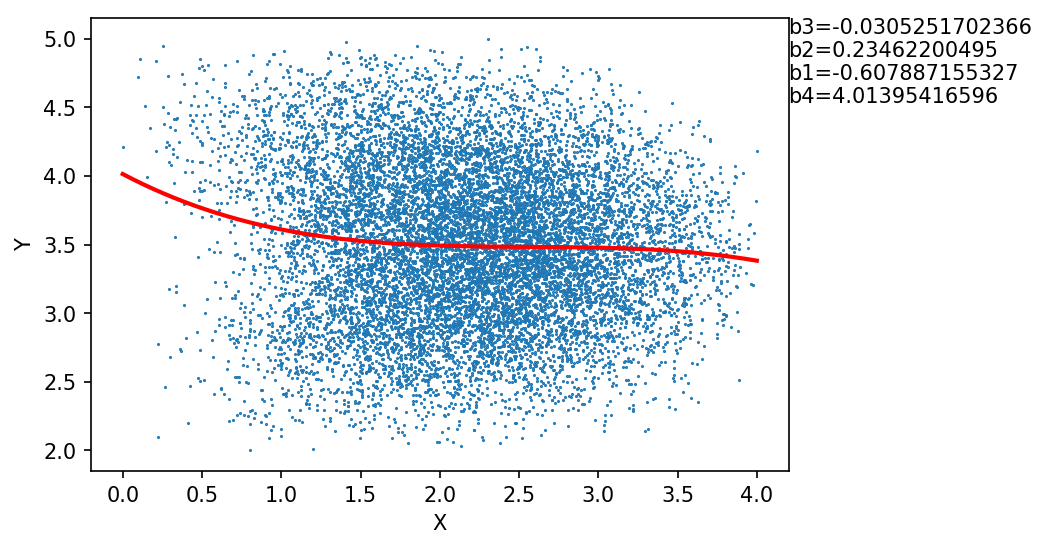

In [203]:
x = np.linspace(0,4,1000)
BB = np.polyfit(XY['X'],XY['Y'],3)
y = np.polyval(BB, x)
plt.figure(dpi = 150)
plt.plot(XY['X'],XY['Y'],'o', markersize = 0.5)
plt.plot(x,y,'r-', linewidth = 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0.9, 0.7, "b3=%s\nb2=%s\nb1=%s\nb4=%s\n" % tuple(BB))

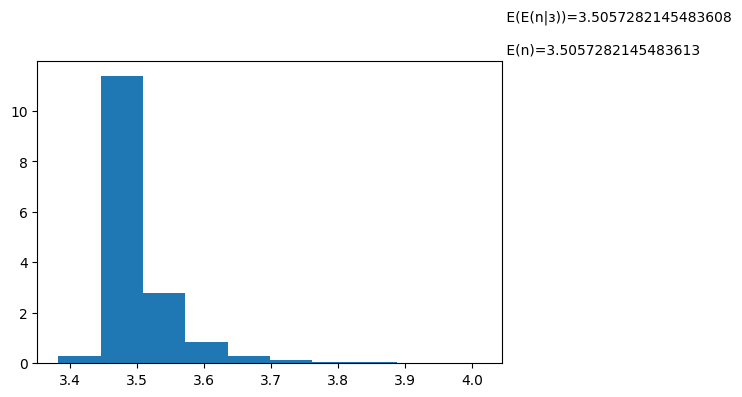

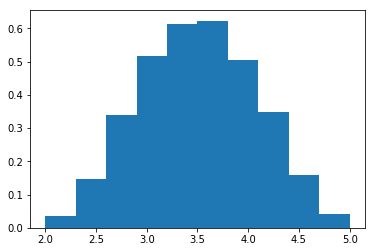

In [204]:
YY = np.polyval(BB, XY['X'])
plt.figure(dpi = 100)
plt.hist(YY, normed=True)
plt.figtext(0.9,0.9," E(E(n|з))=%.16f\n\n E(n)=%.16f" % (np.mean(YY),np.mean(XY['Y'])))
plt.show()
plt.hist(XY['Y'], normed=True)
plt.show()

(array([ 0.00241625,  0.05557386,  0.19861614,  0.40931355,  0.56129597,
         0.63523337,  0.57241074,  0.3841845 ,  0.17082921,  0.03286106]),
 array([-1.7937672 , -1.46294095, -1.13211469, -0.80128843, -0.47046217,
        -0.13963591,  0.19119035,  0.52201661,  0.85284287,  1.18366913,
         1.51449538]),
 <a list of 10 Patch objects>)

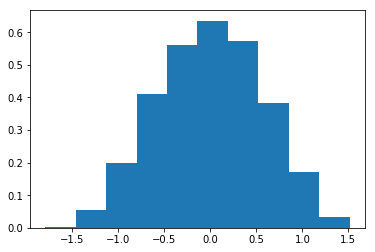

In [205]:
eta_E = XY['Y'] - YY 
plt.hist(eta_E, normed=True)

KstestResult(statistic=0.1306027213037404, pvalue=9.0798962165407134e-186)

Text(0.9,0.7,'b3=0.000168993536501\nb2=-0.353743\nb1=2.38600973099\nb4=-1.7442296527\n')

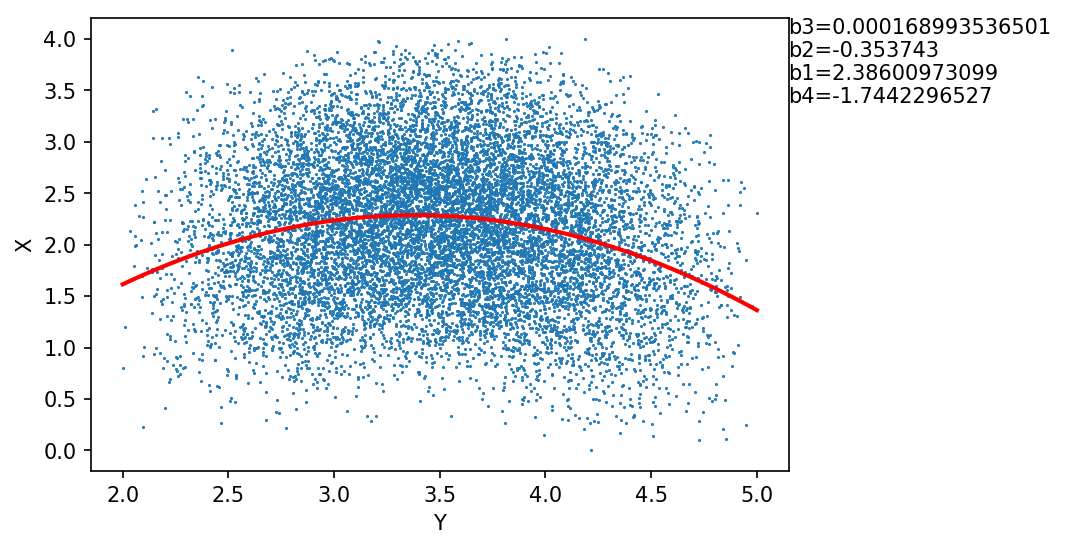

In [114]:
BB = np.polyfit(XY['Y'],XY['X'],3)
y = np.linspace(2,5,1000)
x = np.polyval(BB, y)
plt.figure(dpi = 150)
plt.plot(XY['Y'],XY['X'],'o', markersize = 0.5)
plt.plot(y,x,'r-', linewidth = 2)
plt.xlabel('Y')
plt.ylabel('X')
plt.figtext(0.9, 0.7, "b3=%s\nb2=%f\nb1=%s\nb4=%s\n" % tuple(BB))

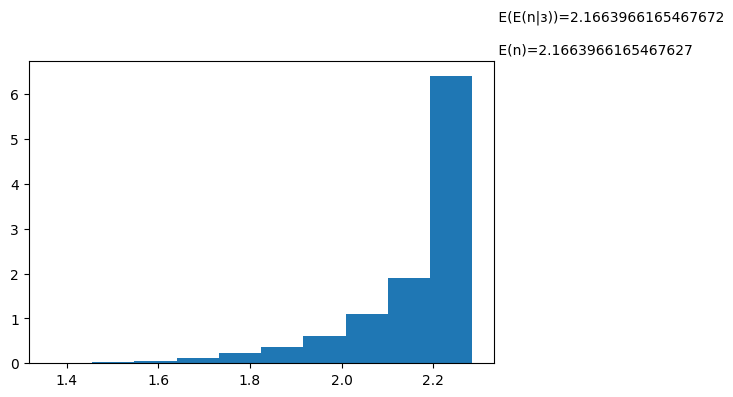

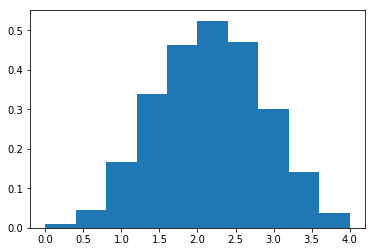

In [115]:
XX = np.polyval(BB, XY['Y'])
plt.figure(dpi = 100)
plt.hist(XX, normed=True)
plt.figtext(0.9,0.9," E(E(n|з))=%.16f\n\n E(n)=%.16f" % (np.mean(XX),np.mean(XY['X'])))
plt.show()
plt.hist(XY['X'], normed=True)
plt.show()

(array([ 0.00899281,  0.04596323,  0.16706635,  0.33872902,  0.46342926,
         0.52418066,  0.47042366,  0.30155875,  0.14148681,  0.03816946]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

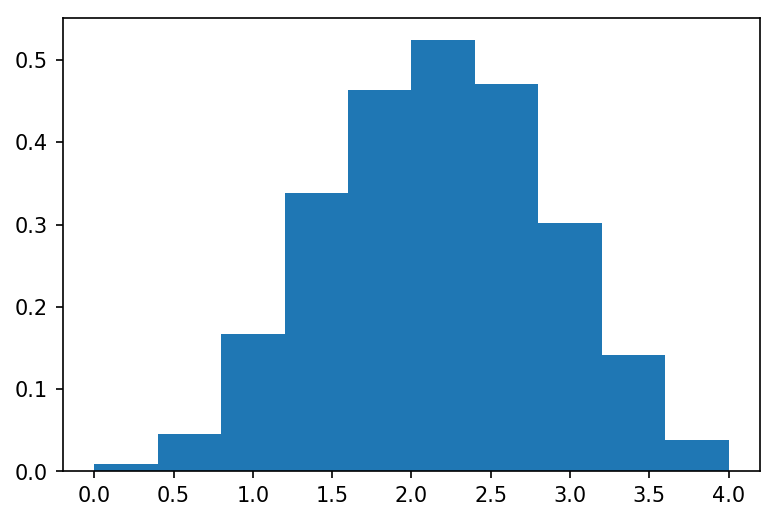

In [116]:
plt.figure(dpi = 150)
plt.hist(XY['X'], normed=True)

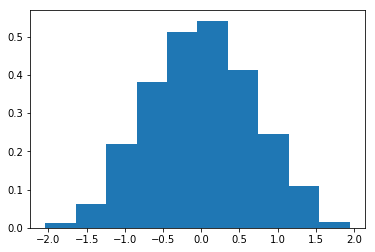

In [117]:
n_E = np.array(XY['X']) - XX
v = plt.hist(n_E, normed=True)
p = v[0]
x = v[1]
plt.show()

In [200]:
stat.kstest(n_E, 'norm')

KstestResult(statistic=0.084326887328509431, pvalue=1.0772168235585269e-77)

In [189]:
stat.chisquare(f_obs=n_E,f_exp=np.random.normal(0,1,len(n_E)))

Power_divergenceResult(statistic=10376.829884855675, pvalue=1.0)

In [191]:
n = len(n_E)
p_theor = [norm.cdf(x[i+1]) - norm.cdf(x[i]) for i in range(len(x)-1)]
sum([((len(n_E[(x[i] < n_E)&(n_E < x[i+1])]) - n*p_theor[i])**2)/(n*p_theor[i]) for i in range(len(x)-1)])

15413.50525193029

In [119]:
len(n_E[(x[2] < n_E)&(n_E < x[3])])

1098

In [120]:
n*p_theor[2]

1151.6666568146977

In [89]:
p

array([ 0.01143843,  0.0630117 ,  0.22034027,  0.38128098,  0.51111719,
        0.54182034,  0.41178346,  0.24482252,  0.10916677,  0.01565259])